In [6]:
import methods
import pymaster as nmt
from importlib import reload
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt

In [30]:
def compute_f_lm(Tlm_out, Tlm_in):
    return np.mean(Tlm_out * Tlm_in.conj(), axis=0) / np.mean(Tlm_in * Tlm_in.conj(), axis=0)

In [27]:
def observe_map(input_map, pixels):
    output_map1 = methods.map2map(input_map, pixels[0], rate, noise_params=None, noise_seed=0, subscan_poly_deg=10, plot=False, replace=False)
    output_map2 = methods.map2map(input_map, pixels[1], rate, noise_params=None, noise_seed=1, subscan_poly_deg=10, plot=False, replace=False)
    return (output_map1 + output_map2) / 2

In [28]:
nside = 128
lmax = 3*nside-1
npix = 12*nside**2
pixels = methods.create_pixels()
rate = 10 #hz

input_map = hp.synfast(np.ones(lmax+1), nside)

mask = np.zeros(npix)
mask[pixels_lr] = 1
mask_apo = nmt.mask_apodization(mask, 2.5, apotype="Smooth")    
# hp.mollview(mask_apo * input_map)

In [29]:
n_sim = 100
Tlm_out = []
Tlm_in = []

for i in range(n_sim):
    input_map = hp.synfast(np.ones(lmax+1), nside)
    output_map = observe_map(input_map, pixels)
    
    Tlm_out.append(hp.map2alm(mask_apo*output_map)) 
    Tlm_in.append(hp.map2alm(mask_apo*input_map))
    
Tlm_out = np.array(Tlm_out)
Tlm_in = np.array(Tlm_in)

In [31]:
f_lm = compute_f_lm(Tlm_out, Tlm_in)

In [40]:
#Now let's try to debias maps
output_map = observe_map(input_map, pixels)
output_alm = hp.map2alm(mask_apo*output_map)

corrected_alm = output_alm/f_lm
corrected_map = hp.alm2map(corrected_alm, nside)

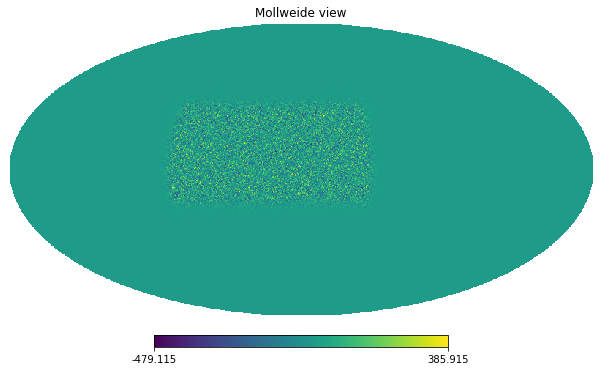

In [43]:
hp.mollview(mask_apo * output_map)

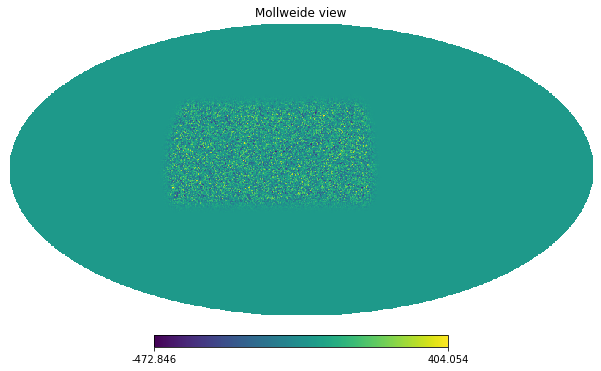

In [44]:
hp.mollview(mask_apo * input_map)

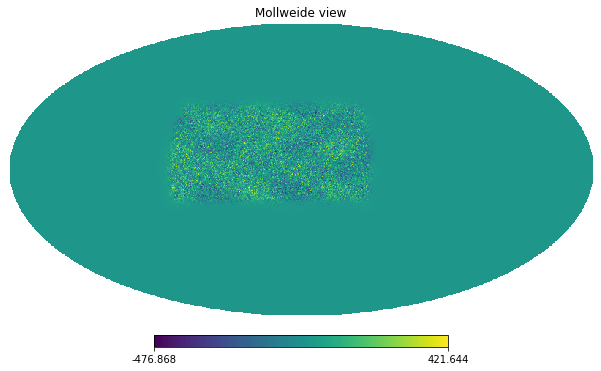

In [42]:
hp.mollview(mask_apo * corrected_map)